In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [15]:

df = pd.read_csv("pollution.csv", encoding='latin1')  # or try 'ISO-8859-1'
print(df.head())


   Sr No.       City        Date  AQI  PM2.5   PM10   NO2   SO2    CO  \
0       1     Nagpur  2025-06-15  249   81.3  114.5  43.4  20.9  2.50   
1       2       Pune  2025-06-17  182  242.3  269.9  54.8  13.1  0.47   
2       3     Nagpur  2025-06-28  414   41.7   73.6  40.7  11.7  1.96   
3       4  Ahmedabad  2025-06-25  162   31.9   60.9  67.8  28.0  0.30   
4       5  Bengaluru  2025-06-06  304  204.7  248.8  61.0  17.2  1.58   

   Temperature (°C) Weather    AQI Category  
0                40   Sunny            Poor  
1                38    Hazy        Moderate  
2                33   Rainy       Hazardous  
3                39   Windy        Moderate  
4                39    Hazy  Very Unhealthy  


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sr No.            1000 non-null   int64  
 1   City              1000 non-null   object 
 2   Date              1000 non-null   object 
 3   AQI               1000 non-null   int64  
 4   PM2.5             1000 non-null   float64
 5   PM10              1000 non-null   float64
 6   NO2               1000 non-null   float64
 7   SO2               1000 non-null   float64
 8   CO                1000 non-null   float64
 9   Temperature (°C)  1000 non-null   int64  
 10  Weather           1000 non-null   object 
 11  AQI Category      1000 non-null   object 
dtypes: float64(5), int64(3), object(4)
memory usage: 93.9+ KB


In [17]:
(df.isnull().sum()/df.shape[0])*100

Sr No.              0.0
City                0.0
Date                0.0
AQI                 0.0
PM2.5               0.0
PM10                0.0
NO2                 0.0
SO2                 0.0
CO                  0.0
Temperature (°C)    0.0
Weather             0.0
AQI Category        0.0
dtype: float64

In [18]:
# Step-by-step processing
df['Date'] = pd.to_datetime(df['Date'])         # Convert Date column
df = df.sort_values('Date')                     # Sort by date
df['Day'] = df['Date'].dt.dayofyear             # Create Day-of-Year column

# Select relevant columns for prediction
df_model = df[['Day', 'Temperature (°C)', 'AQI']].dropna()

In [19]:


# Load your dataset (replace with your actual filename if different)
df = pd.read_csv("pollution.csv", encoding='latin1')
  # or 'utf-8' or 'cp1252' if needed


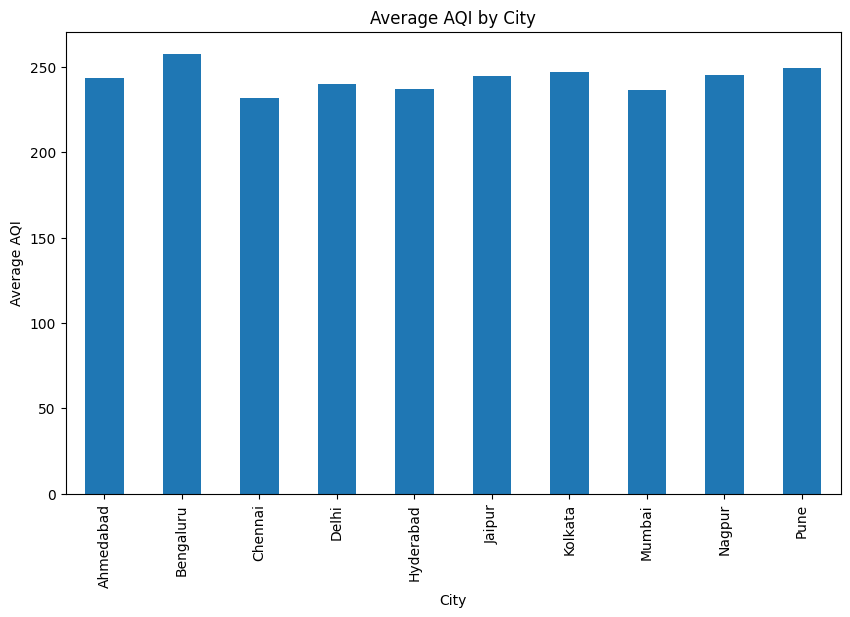

In [21]:

df = pd.read_csv('pollution.csv', encoding='latin1')  # or try cp1252 if needed


# Group by city and get average AQI
avg_aqi = df.groupby('City')['AQI'].mean()

# Plot
avg_aqi.plot(kind='bar', figsize=(10,6), title='Average AQI by City')
plt.ylabel("Average AQI")
plt.show()

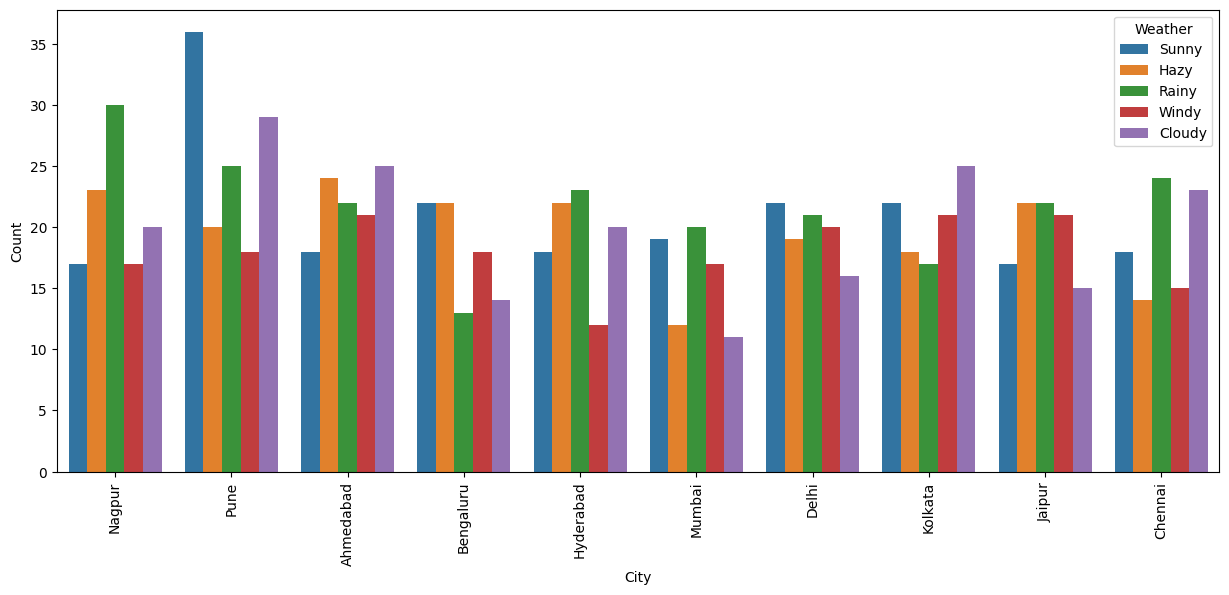

In [25]:
import seaborn as sns

plt.figure(figsize=(15,6))
sns.countplot(data=df, x='City', hue='Weather')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Count')
plt.show()


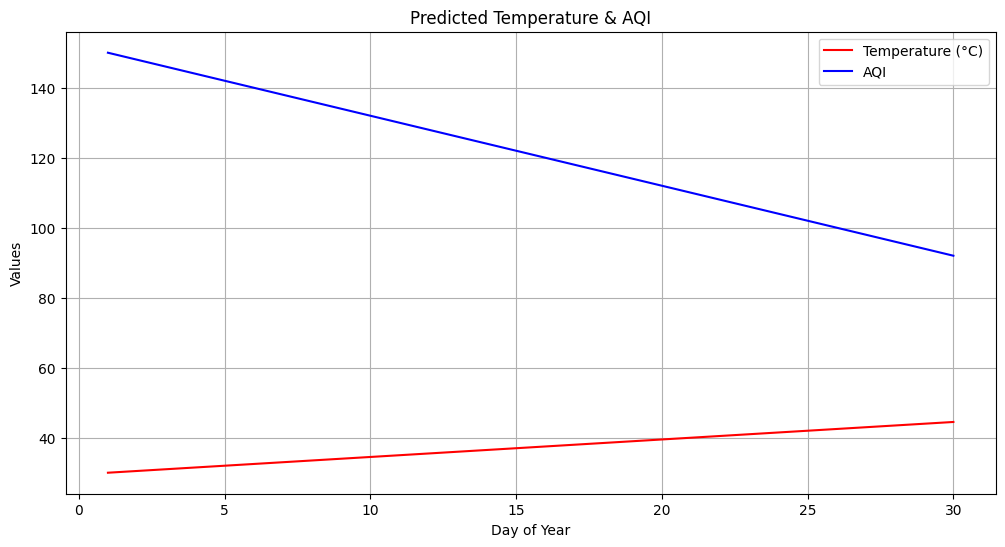

In [27]:
# ✅ Step 1: Create dummy future data (30 days)
future_days = pd.DataFrame({'Day': range(1, 31)})

# Dummy predicted values (example values — you can replace with model predictions)
future_temp = [30 + i * 0.5 for i in range(30)]  # 30°C growing linearly
future_aqi = [150 - i * 2 for i in range(30)]    # AQI dropping over time

# ✅ Step 2: Plot the data
plt.figure(figsize=(12, 6))
plt.plot(future_days['Day'], future_temp, label='Temperature (°C)', color='red')
plt.plot(future_days['Day'], future_aqi, label='AQI', color='blue')
plt.title("Predicted Temperature & AQI")
plt.xlabel("Day of Year")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()

In [44]:

city_avg = df.groupby('City')['AQI'].mean().sort_values(ascending=False)
print(city_avg)

City
Bengaluru    257.730337
Pune         249.421875
Kolkata      247.135922
Nagpur       245.364486
Jaipur       244.628866
Ahmedabad    243.645455
Delhi        239.969388
Hyderabad    237.010526
Mumbai       236.354430
Chennai      231.744681
Name: AQI, dtype: float64


In [64]:
for day, temp, aqi in zip(future_days['Day'], future_temp, future_aqi):
    if aqi > 300:
        print(f"⚠ Hazardous! On Day {day}, AQI is {aqi:.2f}. Avoid outdoor activities. Temperature: {temp:.2f}°C.")
    elif aqi > 200:
        print(f"⚠ Very Unhealthy! On Day {day}, AQI is {aqi:.2f}. Limit outdoor exertion. Temperature: {temp:.2f}°C.")
    elif aqi > 150:
        print(f"⚠ Unhealthy! On Day {day}, AQI is {aqi:.2f}. Be cautious outdoors. Temperature: {temp:.2f}°C.")
    elif aqi > 100:
        print(f"⚠ Moderate! On Day {day}, AQI is {aqi:.2f}. Sensitive groups should reduce outdoor activity. Temperature: {temp:.2f}°C.")
    else:
        print(f"✅ Good air quality on Day {day} with AQI {aqi:.2f}. Enjoy your day! Temperature: {temp:.2f}°C.")


⚠ Moderate! On Day 1, AQI is 150.00. Sensitive groups should reduce outdoor activity. Temperature: 30.00°C.
⚠ Moderate! On Day 2, AQI is 148.00. Sensitive groups should reduce outdoor activity. Temperature: 30.50°C.
⚠ Moderate! On Day 3, AQI is 146.00. Sensitive groups should reduce outdoor activity. Temperature: 31.00°C.
⚠ Moderate! On Day 4, AQI is 144.00. Sensitive groups should reduce outdoor activity. Temperature: 31.50°C.
⚠ Moderate! On Day 5, AQI is 142.00. Sensitive groups should reduce outdoor activity. Temperature: 32.00°C.
⚠ Moderate! On Day 6, AQI is 140.00. Sensitive groups should reduce outdoor activity. Temperature: 32.50°C.
⚠ Moderate! On Day 7, AQI is 138.00. Sensitive groups should reduce outdoor activity. Temperature: 33.00°C.
⚠ Moderate! On Day 8, AQI is 136.00. Sensitive groups should reduce outdoor activity. Temperature: 33.50°C.
⚠ Moderate! On Day 9, AQI is 134.00. Sensitive groups should reduce outdoor activity. Temperature: 34.00°C.
⚠ Moderate! On Day 10, AQI i

In [52]:
city_avg = df.groupby('City')[['AQI']].mean().reset_index()



In [59]:
city_avg = df.groupby('City').agg({
    'AQI': 'mean',
    'Temperature (°C)': 'mean'
}).reset_index()

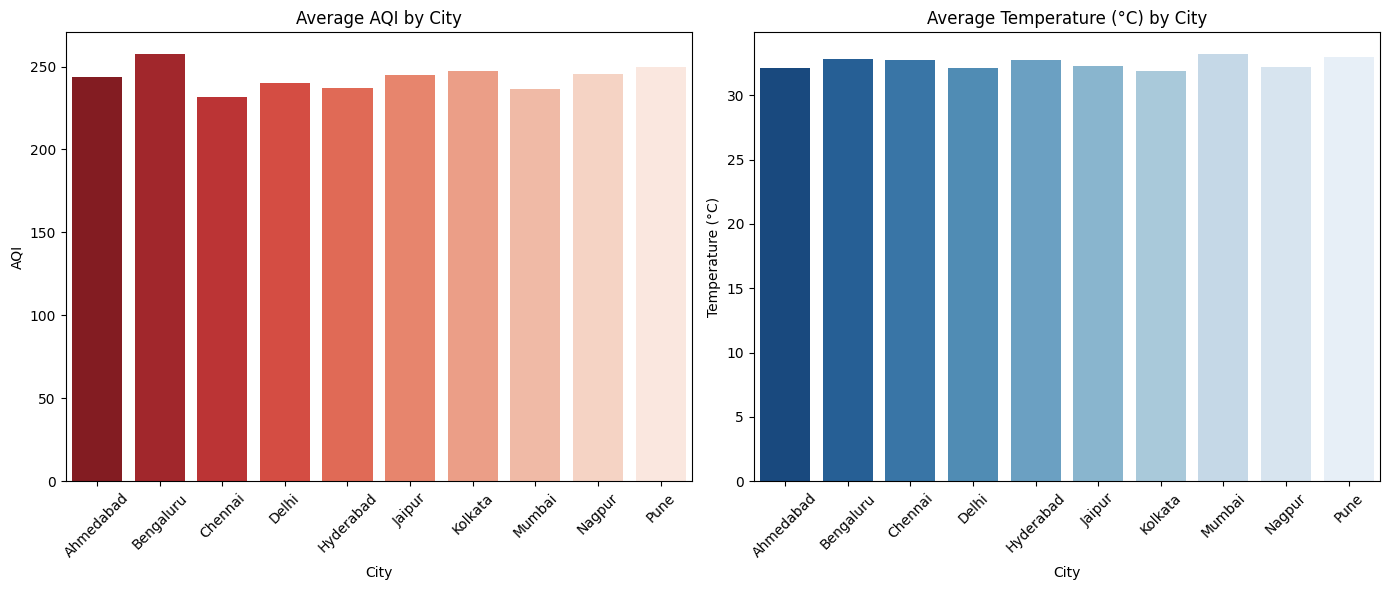

In [61]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.barplot(data=city_avg, x='City', y='AQI', palette='Reds_r')
plt.title('Average AQI by City')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(data=city_avg, x='City', y='Temperature (°C)', palette='Blues_r')
plt.title('Average Temperature (°C) by City')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


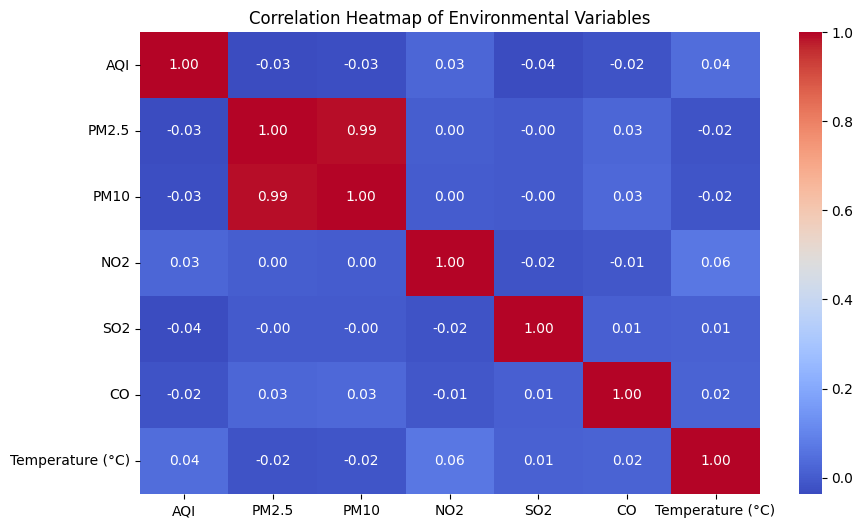

In [63]:
num_cols = ['AQI', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Temperature (°C)']
corr = df[num_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Environmental Variables')
plt.show()